In [ ]:
# default_exp first_layer_thickness_scan

#  First layer thickness scan
> Study the effect of the variation the first layer thickness on energy deposited in the sensor.

![image.png](media/layer_thickness_scan.png "Gate Simulation")

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
#hide
from ProtonBeamTherapy.macrotools import *
from ProtonBeamTherapy.analysis import *

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Beam energy 250 MeV

vary thickness of the first layer between 0.5 cm and 1.5 cm in 1 mm steps

In [ ]:
edep = []
th0 = np.linspace(0.5, 1.5, num=10)
for t in th0:
    # vary the thickness only for the 0th layer for the other 19 it will be 1 cm
    main_macro, output_root = create_all(phantom_layer_thickness=[t]+[1]*19) 
    run_macro(main_macro)
    root_hits_file = output_root['hits'][0]
    edep.append(get_edep_data(get_df_subentry2(root_hits_file), sensor=0))

Text(0.5, 0, 'keV')

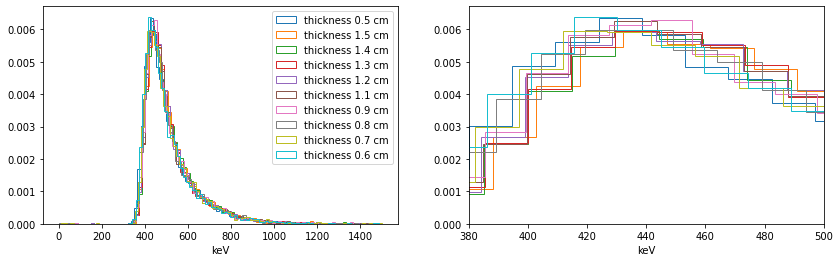

In [ ]:
fig0, (ax0, ax_0) = plt.subplots(1, 2, figsize=(14, 4))
for i in range(10):
    __ = ax0.hist(edep[-i][edep[-i]<1500], bins=100, histtype='step', density=True, 
                  label=f'thickness {round(th0[-i], 1)} cm')
ax0.set_xlabel('keV')
ax0.legend()
for i in range(10):
    __ = ax_0.hist(edep[-i][edep[-i]<1500], bins=100, histtype='step', density=True, 
                   label=f'thickness {round(th0[-i], 1)} cm')
ax_0.set_xlim((380, 500))
ax_0.set_xlabel('keV')

Landau has a small shift with thickness, but will need a larger statistics to say it definitevely

In [ ]:
m = np.array([np.mean(e) for e in edep])
em = np.array([stats.sem(e) for e in edep])
tm = np.array([stats.tmean(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep])
etm = np.array([stats.tsem(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep])

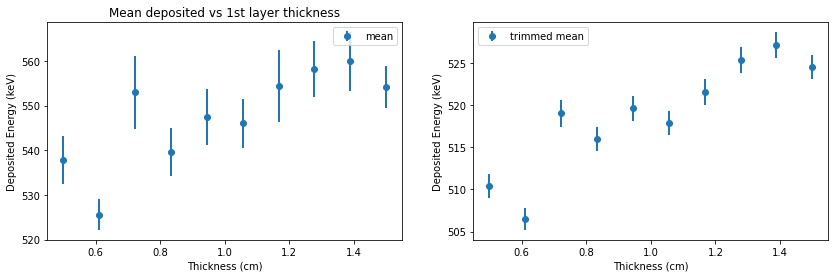

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1,2,figsize=(14, 4))
ax2.errorbar(th0, tm, yerr=etm, fmt='o', lw=0, elinewidth=2, label='trimmed mean')
ax1.errorbar(th0, m, yerr=em, fmt='o', lw=0, elinewidth=2, label='mean')
ax1.set_title('Mean deposited vs 1st layer thickness')
ax1.set_xlabel('Thickness (cm)')
ax1.set_ylabel('Deposited Energy (keV)')
ax1.legend()
#ax2.set_xlim(173, 240)
#ax2.set_ylim(0, 0.01)
#ax2.scatter(th0, tm /etm, label='SNR for trimmed mean')
ax2.set_xlabel('Thickness (cm)')
ax2.set_ylabel('Deposited Energy (keV)')
ax2.legend()

## Beam energy 200 MeV

vary thickness of the first layer between 0.5 cm and 1.5 cm in 1 mm steps

In [ ]:
edep200 = []
th0_200 = np.linspace(0.5, 1.5, num=10)
for t in th0:
    # vary the thickness only for the 0th layer for the other 19 it will be 1 cm
    main_macro, output_root = create_all(beam_energy=200, phantom_layer_thickness=[t]+[1]*19) 
    run_macro(main_macro)
    root_hits_file = output_root['hits'][0]
    edep200.append(get_edep_data(get_df_subentry2(root_hits_file), sensor=0))

In [ ]:
m200 = np.array([np.mean(e) for e in edep200])
em200 = np.array([stats.sem(e) for e in edep200])
tm200 = np.array([stats.tmean(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep200])
etm200 = np.array([stats.tsem(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep200])

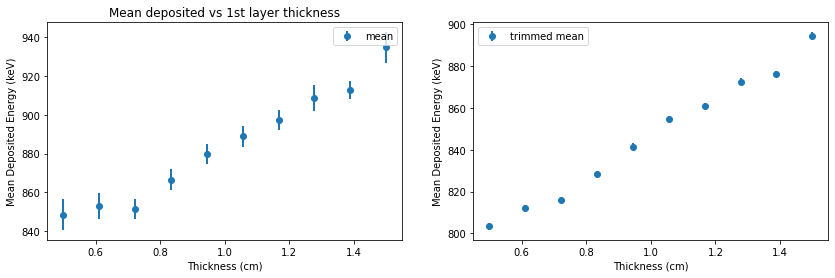

In [ ]:
fig2, (ax3, ax4) = plt.subplots(1,2,figsize=(14, 4))
ax4.errorbar(th0_200, tm200, yerr=etm200, fmt='o', lw=0, elinewidth=2, label='trimmed mean')
ax3.errorbar(th0_200, m200, yerr=em200, fmt='o', lw=0, elinewidth=2, label='mean')
ax3.set_title('Mean deposited vs 1st layer thickness')
ax3.set_xlabel('Thickness (cm)')
ax3.set_ylabel('Mean Deposited Energy (keV)')
ax3.legend()
#ax2.set_xlim(173, 240)
#ax2.set_ylim(0, 0.01)
#ax2.scatter(th0, tm /etm, label='SNR for trimmed mean')
ax4.set_xlabel('Thickness (cm)')
ax4.set_ylabel('Mean Deposited Energy (keV)')
ax4.legend()

In [ ]:
df = get_df_subentry2(root_hits_file)

In [ ]:
df[df["eventID"]==4]

,PDGEncoding,trackID,parentID,trackLocalTime,time,edep,stepLength,trackLength,posX,posY,...,axialPos,rotationAngle,volumeID,processName,comptVolName,RayleighVolName,septalNb,sourceType,decayType,gammaType
entry,,,,,,,,,,,,,,,,,,,,,
3,2212,1,0,3.263051e-09,3.263051e-09,0.705571,0.504962,463.910980,-14.390350,-212.750000,...,0.0,0.0,0,Transportation,NULL,NULL,0,0,0,0
4,11,96,1,4.481630e-11,3.290691e-09,0.001412,0.000880,3.991429,-17.695736,-212.250595,...,0.0,0.0,0,msc,NULL,NULL,0,0,0,0
5,11,96,1,4.482516e-11,3.290699e-09,0.002915,0.000889,3.992318,-17.695107,-212.250809,...,0.0,0.0,0,msc,NULL,NULL,0,0,0,0
6,11,96,1,4.483372e-11,3.290708e-09,0.007070,0.000876,3.993194,-17.694956,-212.251312,...,0.0,0.0,0,msc,NULL,NULL,0,0,0,0
7,11,96,1,4.483857e-11,3.290713e-09,0.007008,0.000825,3.994020,-17.694946,-212.251373,...,0.0,0.0,0,eIoni,NULL,NULL,0,0,0,0


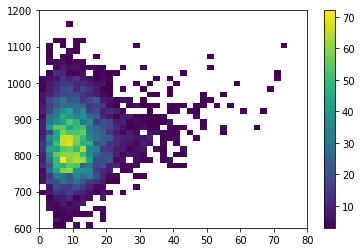

In [ ]:
from matplotlib import colors

df['r'] = np.sqrt(df['posX']**2 + df['posZ']**2)
__= plt.hist2d(df['r'], df['edep']*1000, bins=40, cmin=3, cmax=200, range=[[0, 80],[600, 1200]])
plt.colorbar()

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_macrotools.ipynb.
Converted 01_analysis.ipynb.
Converted 02_scanners.ipynb.
Converted 20_analysis0.ipynb.
Converted 21_analysis1.ipynb.
Converted index.ipynb.
